In [34]:
import sys
sys.path.append("./")
sys.path.append("../")

In [37]:
import os
import pickle
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
from collections import defaultdict

In [38]:
data_dir = "/home/jaeho/ssd/datasets/deepfashion/split"

In [39]:
data_paths = glob(os.path.join(data_dir, "*"))

In [40]:
train_path = [x for x in data_paths if 'train' in x][0]

In [41]:
with open(train_path, 'rb') as f:
    train_data = pickle.load(f)

In [44]:
cat_count_dict = defaultdict(int)
att_count_dict = defaultdict(int)
for file_path, data in tqdm(train_data.items()):
    # print(file_path)
    # print()
    # print(data.keys())
    for cat in data['category']:
        cat_count_dict[cat] += 1
    attr_infos = data['attr']
    attr_infos = [idx for idx, value in enumerate(attr_infos) if value != -1]
    for attr_info in attr_infos:
        att_count_dict[attr_info] += 1
        

100%|██████████| 209222/209222 [00:05<00:00, 37234.00it/s]


In [45]:
data['category']

[39]

In [46]:
len(cat_count_dict.keys())

46

<BarContainer object of 46 artists>

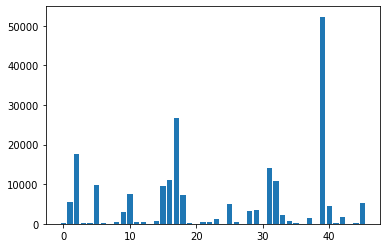

In [47]:
plt.bar(cat_count_dict.keys(), cat_count_dict.values())

In [48]:
min(cat_count_dict.values()), max(cat_count_dict.values())

(13, 52269)

In [50]:
max(cat_count_dict.values()) / sum(cat_count_dict.values())

0.24982554415883607

<BarContainer object of 1000 artists>

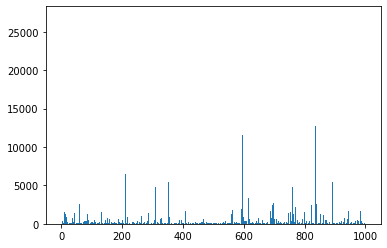

In [48]:
plt.bar(att_count_dict.keys(), att_count_dict.values())

In [50]:
min(att_count_dict.values()), max(att_count_dict.values())

(33, 26964)

In [27]:
test_path = [x for x in data_paths if 'test' in x][0]

In [28]:
with open(test_path, 'rb') as f:
    test_data = pickle.load(f)

In [29]:
test_cat_count_dict = defaultdict(int)
for test_file_path, inner_data in tqdm(test_data.items()):
    for cat in inner_data['category']:
        test_cat_count_dict[cat] += 1

100%|██████████| 40000/40000 [00:00<00:00, 2323134.95it/s]


<BarContainer object of 46 artists>

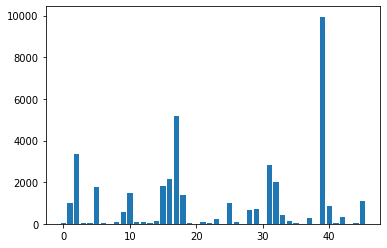

In [31]:
plt.bar(test_cat_count_dict.keys(), test_cat_count_dict.values())

In [32]:
import numpy as np

In [34]:
min(test_cat_count_dict.values())

1

In [35]:
valid_path = [x for x in data_paths if 'valid' in x][0]

In [36]:
with open(valid_path, 'rb') as f:
    valid_data = pickle.load(f)

In [37]:
valid_cat_count_dict = defaultdict(int)
for valid_file_path, inner_data in tqdm(valid_data.items()):
    for cat in inner_data['category']:
        valid_cat_count_dict[cat] += 1

100%|██████████| 40000/40000 [00:00<00:00, 2209767.26it/s]


<BarContainer object of 46 artists>

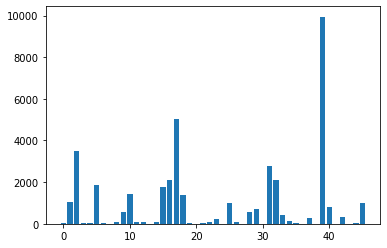

In [38]:
plt.bar(valid_cat_count_dict.keys(), valid_cat_count_dict.values())

---

Loss에 들어가는 Weight를 계산해보자

In [7]:
len(train_data)

209222

In [8]:
import torch
import torch.nn as nn

In [9]:
numSample_list = [4949, 9999]
weights = [1 - (x  / sum(numSample_list)) for x in numSample_list]

In [10]:
weights

[0.6689189189189189, 0.33108108108108103]

In [21]:
cat_cnt_dict = defaultdict(int)
att_cnt_dict = defaultdict(int)

for file_path, file_data in tqdm(train_data.items()):
    # print(file_path)
    # print(file_data.keys())
    for cat in file_data['category']:
        cat_cnt_dict[int(cat)] += 1
    att_infos = [idx for idx, value in enumerate(file_data['attr']) if value != -1]
    for att in att_infos:
        att_cnt_dict[int(att)] += 1

100%|██████████| 209222/209222 [00:05<00:00, 37956.64it/s]


In [22]:
cat_cnt_dict

defaultdict(int,
            {2: 17713,
             1: 5442,
             4: 231,
             3: 228,
             0: 108,
             17: 26703,
             16: 11161,
             18: 7337,
             15: 9550,
             6: 236,
             9: 2934,
             5: 9703,
             10: 7552,
             8: 515,
             14: 582,
             11: 547,
             19: 111,
             12: 473,
             13: 68,
             7: 13,
             32: 10678,
             31: 14075,
             25: 5081,
             28: 3185,
             33: 2195,
             26: 425,
             23: 1222,
             34: 821,
             29: 3574,
             22: 357,
             21: 386,
             35: 278,
             30: 25,
             24: 38,
             27: 34,
             20: 57,
             39: 52269,
             45: 5307,
             37: 1563,
             42: 1671,
             40: 4452,
             44: 104,
             36: 49,
             41: 102,
     

In [23]:
att_cnt_dict

defaultdict(int,
            {717: 4872,
             818: 3100,
             141: 1535,
             837: 5778,
             956: 3974,
             716: 829,
             349: 208,
             405: 221,
             810: 181,
             457: 2442,
             710: 298,
             577: 4313,
             853: 118,
             162: 5229,
             353: 5488,
             763: 446,
             983: 3406,
             965: 281,
             179: 147,
             822: 10771,
             889: 626,
             191: 1617,
             540: 360,
             570: 171,
             730: 26964,
             890: 259,
             89: 45,
             913: 2677,
             994: 126,
             719: 95,
             761: 63,
             467: 217,
             181: 3981,
             251: 313,
             112: 3690,
             715: 154,
             69: 143,
             699: 1264,
             760: 4778,
             929: 605,
             513: 14763,
             124: 565,


In [26]:
cat_cnt_dict = dict(sorted(cat_cnt_dict.items(), key = lambda x:x[0]))
att_cnt_dict = dict(sorted(att_cnt_dict.items(), key = lambda x:x[0]))

In [31]:
cat_weight_dict = {key: 1-value/sum(cat_cnt_dict.values()) for key, value in cat_cnt_dict.items()}

In [33]:
sum(cat_cnt_dict.values())

209222

In [32]:
cat_weight_dict

{0: 0.9994838018946383,
 1: 0.9739893510242709,
 2: 0.9153387311085832,
 3: 0.9989102484442363,
 4: 0.9988959096079763,
 5: 0.9536234239229144,
 6: 0.9988720115475428,
 7: 0.9999378650428731,
 8: 0.9975384997753582,
 9: 0.9859766181376719,
 10: 0.9639043695213696,
 11: 0.9973855521885844,
 12: 0.9977392434829989,
 13: 0.9996749863781056,
 14: 0.9972182657655505,
 15: 0.954354704572177,
 16: 0.9466547495005305,
 17: 0.8723700184493026,
 18: 0.9649319861200065,
 19: 0.9994694630583781,
 20: 0.9997275621110591,
 21: 0.9981550697345404,
 22: 0.9982936784850541,
 23: 0.9941593140300733,
 24: 0.999818374740706,
 25: 0.9757147909875634,
 26: 0.9979686648631597,
 27: 0.9998374931890528,
 28: 0.9847769355039145,
 29: 0.9829176664021948,
 30: 0.9998805096978329,
 31: 0.9327269598799361,
 32: 0.9489633021383984,
 33: 0.9895087514697307,
 34: 0.9960759384768332,
 35: 0.9986712678399021,
 36: 0.9997657990077525,
 37: 0.9925294663085144,
 38: 0.9999330854307864,
 39: 0.7501744558411639,
 40: 0.97872